# K Nearest Neighbors

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Task 1: Iris Dataset

### Load Dataset

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.DESCR) # explore what is in variable iris

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
X_iris = iris.data
y_iris = iris.target

### Split dataset into train and test

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.33, random_state=42)


### Define KNN Algorithm

In [5]:
# Calculate euclidean distance between x1 and x2. You can assume both x1 and x2 are numpy arrays
def distance(x1, x2):
    return np.linalg.norm(x1 - x2)

# Implement knn algorithm. Return majority label for given test_sample and k
def knn(X_train, y_train, test_sample, k=7):
    distances = []
    for i in range(len(X_train)):
        distances.append([distance(X_train[i], test_sample), y_train[i]])
    distances.sort()
    return pd.DataFrame(distances[:k])[1].value_counts().idxmax() # Make sure you understand this
    
# Few other ways of calculating majority label:
# 1: using mode function
#     return pd.DataFrame(distances[:k])[1].mode().iloc[0]
# (why did we use iloc[0]? See output of pd.Series([2,2,1]).mode() and pd.Series([2,2,1,1]).mode(). Using .iloc[0] we choose the first value i.e. 2)
# 2: using max function
#     labels = [pair[1] for pair in distances[:k]]
#     return max(set(labels), key=labels.count)
# It is not necessary to use library functions. You can write your own implementation for finding majority label.


# Return class of each test sample predicted by knn 
def predict(X_train, y_train, X_test, k=7):
    y_pred = []
    for test_sample in X_test:
        y_pred.append(knn(X_train, y_train, test_sample, k))
    return y_pred

### Get results for k=3

In [6]:
y_pred = predict(X_train, y_train, X_test, 3)

### Evaluate results

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(accuracy_score(y_test, y_pred)) # accuracy_score
print(confusion_matrix(y_test, y_pred)) # confusion_matrix
print(classification_report(y_test, y_pred)) # classification_report

0.98
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

   micro avg       0.98      0.98      0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### Hyperparameter Tuning

In [8]:
for k in range(2,10):
    print(k,':',accuracy_score(predict(X_train, y_train, X_test, k),y_test))

2 : 0.98
3 : 0.98
4 : 1.0
5 : 0.98
6 : 0.98
7 : 0.98
8 : 1.0
9 : 0.98


## Task 2 : MNIST

### Load Dataset

In [9]:
mnist = pd.read_csv('mnist.csv')
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [11]:
X_mnist = mnist.drop('label',axis=1)
y_mnist = mnist.label

### Visualize the data

3


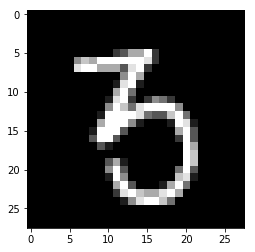

In [12]:
plt.imshow(X_mnist.iloc[90].values.reshape((28, 28)), cmap='gray')
print(y_mnist.iloc[90])

### Split dataset into train and test

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_mnist.values, y_mnist.values, test_size=0.33, random_state=42)


### Modify KNN algorithm to include hyperparameter tuning

(So that we can avoid calculating distance every time we change k)

In [14]:
# Parameter k is now a list of values

# Distance function remains same

# For each k in k_values return majority label
def knn_batch_k(X_train, y_train, test_sample, k_values):
    distances = []
    for i in range(len(X_train)):
        distances.append([distance(X_train[i], test_sample), y_train[i]])
    distances.sort()
    return [pd.DataFrame(distances[:k])[1].value_counts().idxmax() for k in k_values]

# Return class of each test sample predicted by knn for each k in k_value.
def predict_batch_k(X_train, y_train, X_test, k_values=np.arange(2,10)):
    y_pred = []
    for test_sample in X_test:
        y_pred.append(knn_batch_k(X_train, y_train, test_sample, k_values))
    return y_pred

### Get results for k=[2,3,4,5,6,7,8,9]

In [15]:
k_values = np.arange(2,10)
y_pred = predict_batch_k(X_train, y_train, X_test, k_values) # This takes 1 hr to run on complete dataset (CPU)

### Evaluate results

In [16]:
y_pred = np.asarray(y_pred)
y_pred = y_pred.T
y_pred

array([[8, 1, 9, ..., 6, 3, 2],
       [8, 1, 9, ..., 6, 3, 2],
       [8, 1, 9, ..., 6, 3, 2],
       ...,
       [8, 1, 9, ..., 6, 3, 2],
       [8, 1, 9, ..., 6, 3, 2],
       [8, 1, 9, ..., 6, 3, 2]], dtype=int64)

In [17]:
itr = 0
for k in k_values:
    print(k,':',accuracy_score(y_test, y_pred[itr]))
    itr+=1

2 : 0.9558441558441558
3 : 0.9655122655122655
4 : 0.9609668109668109
5 : 0.9647907647907648
6 : 0.9618326118326118
7 : 0.9627705627705627
8 : 0.9613997113997114
9 : 0.9619047619047619
